`Task 5:`**Credit Card Fraud Detection model**

`Done by : Mohamad Moallem`

the cell below is where all the imports we will use will be placed

In [138]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

lets start by reading and understanding our dataset

In [110]:
data_set=pd.read_csv('creditcard.csv')
data_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [111]:
data_set.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [112]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

lets start checking for missing or duplicated values in our data set

In [113]:
data_set.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [114]:
data_set.duplicated().sum()

1081

it seems we have no missing values but we can see that we have 1081 duplicates between our columns lets get rid of them


In [115]:
data_set.drop_duplicates(inplace=True)

In [116]:
data_set.duplicated().sum()

0

now that we have cleaned our dataset lets continue to the next part

we can see that all the values in our data set are float and int which is great but since it is hard to know if all the columns are on the same scale so they won't affect our results so it is best to standarize our dataset so that all our features are on the same scale especially since we might be using knn classifier which a distance based algo. which means extreme values affects its results also standarizing our dataset can help us get rid of unwanted outleirs 

In [117]:
Classes=data_set['Class']

In [118]:
data_set=data_set.drop('Class',axis=1)

In [119]:
cols=data_set.columns

In [120]:
data_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [121]:
scaler= StandardScaler()
data_set_scaled=scaler.fit_transform(data_set)

In [122]:
data_set_scaled=pd.DataFrame(data_set_scaled,columns=cols)

In [123]:
data_set_scaled = pd.concat([data_set_scaled, Classes.reset_index(drop=True)], axis=1)


In [124]:
data_set_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,...,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0.244200,0
1,-1.996823,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,...,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.342584,0
2,-1.996802,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,...,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.158900,0
3,-1.996802,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,...,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0.139886,0
4,-1.996781,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,...,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,-0.073813,0


now lets check the correlation between our columns

<Axes: >

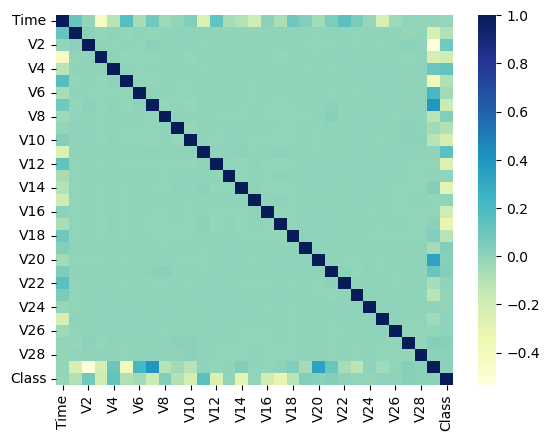

In [125]:
sns.heatmap(data_set_scaled.corr(),cmap='YlGnBu')

this isn't so clear so lets use the correlation matrix

In [126]:
corr_matrix=data_set_scaled.corr()
display(corr_matrix['Class'].sort_values(ascending=False))

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

We can see that features like V17, V14, V4, V2, and V11 have the highest positive and negative correlations with Class, indicating their importance in predicting the target. On the other hand, features with correlation values close to 0, such as V25, V22, V26, Amount, and others, contribute minimally and may be good candidates for removal to reduce dimensionality.

In [127]:
data_set_scaled = data_set_scaled.drop(['V28', 'Amount', 'V22', 'V26', 'V25', 'V15', 'V13', 'V23', 'V24', 'V6', 'V5', 'V9', 'V1', 'V18', 'V7', 'V3', 'V16', 'V10', 'V12'], axis=1)


In [128]:
data_set_scaled.head()

,Time,V2,V4,V8,V11,V14,V17,V19,V20,V21,V27,Class
0,-1.996823,-0.041687,0.976623,0.084434,-0.541662,-0.327050,0.246646,0.497011,0.326273,-0.024777,0.333033,0
1,-1.996823,0.164138,0.318998,0.072903,1.582896,-0.151252,-0.136468,-0.178907,-0.089963,-0.311372,-0.027154,0
2,-1.996802,-0.811337,0.270648,0.210788,0.612829,-0.174539,1.317260,-2.780497,0.681564,0.343094,-0.144325,0
3,-1.996802,-0.109972,-0.608355,0.320843,-0.222524,-0.302638,-0.812176,-1.515112,-0.270428,-0.149093,0.154039,0
4,-1.996781,0.535539,0.287092,-0.228725,-0.807922,-1.176125,-0.281545,0.988165,0.530343,-0.012516,0.550001,0


now that this is done we can go start by splitting our data into training data and testing data

In [129]:
X=data_set_scaled.drop('Class',axis=1)
Y=data_set_scaled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,train_size=0.8, random_state=42)

In [130]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(226980, 11)
(56746, 11)
(226980,)
(56746,)


now lets start by training our model

the model i will start with is knn classifier

In [131]:
model= KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

now that we have trained the model lets start testing it and check out the accuracy of its prediction

In [132]:
y_pred=model.predict(X_test)

In [133]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [134]:
accuracy_score(y_test,y_pred)

0.9995241955380115

The model gave an amazing result of a 99.95% accuracy rate. This impressive performance suggests that the selected features are highly relevant and the model is effectively capturing the underlying patterns in the data.

but this also can be a sign for overfitting so it is better to also evalute using other metrics

In [136]:
recall_score(y_test,y_pred)

0.7333333333333333

This means that the model correctly identifies 73.3% of the actual positive cases. While this is decent, it suggests that the model is missing some positive instances (false negatives).
This is because the amount of fraud emails(1) in the data set are signeficantly less than that of non_fraud emails

In [137]:
precision_score(y_test,y_pred)

0.9565217391304348

This indicates that about 95.7% of the instances predicted as positive (or the positive class) are actually correct. This precision suggests that the model is 95.7% of the time is correct

In [140]:
f1_score(y_test,y_pred)

0.8301886792452831

The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. An F1 score of 0.830 indicates a reasonable balance between precision and recall, but there’s still room for improvement, especially in recall.

with we can conclude this task and my virtual internship at codsoft it was a fruitful journey all thats left is to extract the models prediction

In [141]:
KNN_prediction = pd.DataFrame({
    "Prediction": y_pred
})

KNN_prediction.to_csv("KNN_CLassifier_Fraud_Classifier_Model.csv", index=False)